# Exploratory Data Analysis (EDA)

## 1 导入基本库及中文支持

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体，确保matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['FangSong']  # 仿宋
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用于显示中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

## 2 数据导入与基本信息概览

 ### 2.1 基本信息概览

In [3]:
# 加数据
df = pd.read_csv('../data/creditcard.csv')

# 查看数据规模与类型
print(f"数据规模：{df.shape}")
# 查看数据的前5行
display(df.head())
# 查看数据的维度、列名和数据类型
df.info()
# 查看描述性统计
print("描述性统计：")
df.describe()

数据规模：(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2.2 缺失值与重复值检查

In [4]:
# 检查缺失值
print(f"缺失值情况：\n{df.isnull().sum()}")

# 检查重复值
print(f"重复数据数量：{df.duplicated().sum()}")


缺失值情况：
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
重复数据数量：1081


## 3 数据分布与异常值分析

### 3.1 目标变量分布

In [5]:
# # 目标变量分布
# plt.figure(figsize=(4, 3))
# sns.countplot(x='Class', data=df)
# plt.title('欺诈与非欺诈交易分布')
# plt.xlabel('交易类型（0：非欺诈，1：欺诈）')
# plt.ylabel('数量')
# plt.show()
#
# # 输出目标变量的统计信息
# print(df['Class'].value_counts())

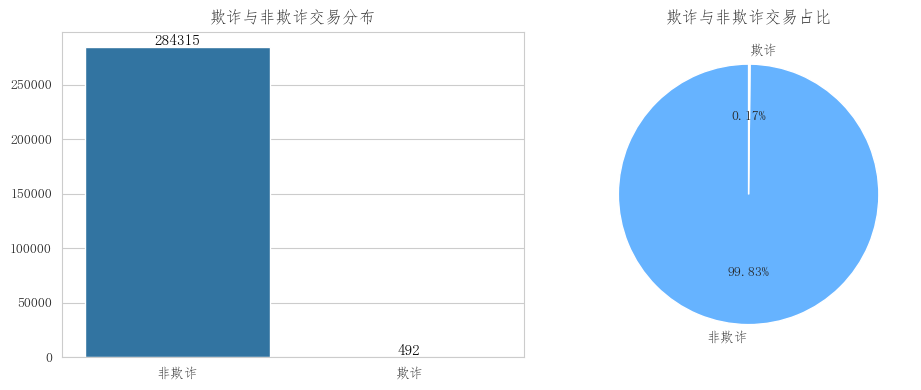

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df['Class'].value_counts()
labels = ['非欺诈', '欺诈']

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 左：柱状图
sns.countplot(x='Class', data=df, ax=axes[0])
axes[0].set_title('欺诈与非欺诈交易分布')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
# axes[0].set_xlabel('交易类型（0：非欺诈，1：欺诈）')
# axes[0].set_ylabel('数量')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(labels)

# 在柱子上加上数字
for patch in axes[0].patches:
    height = patch.get_height()
    axes[0].text(patch.get_x() + patch.get_width() / 2, height,
                 f'{int(height)}', ha='center', va='bottom', fontsize=11, color='black')

# 右：饼状图
axes[1].pie(class_counts, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
axes[1].set_title('欺诈与非欺诈交易占比')

plt.tight_layout()
plt.show()

#### 3.2 连续特征分布

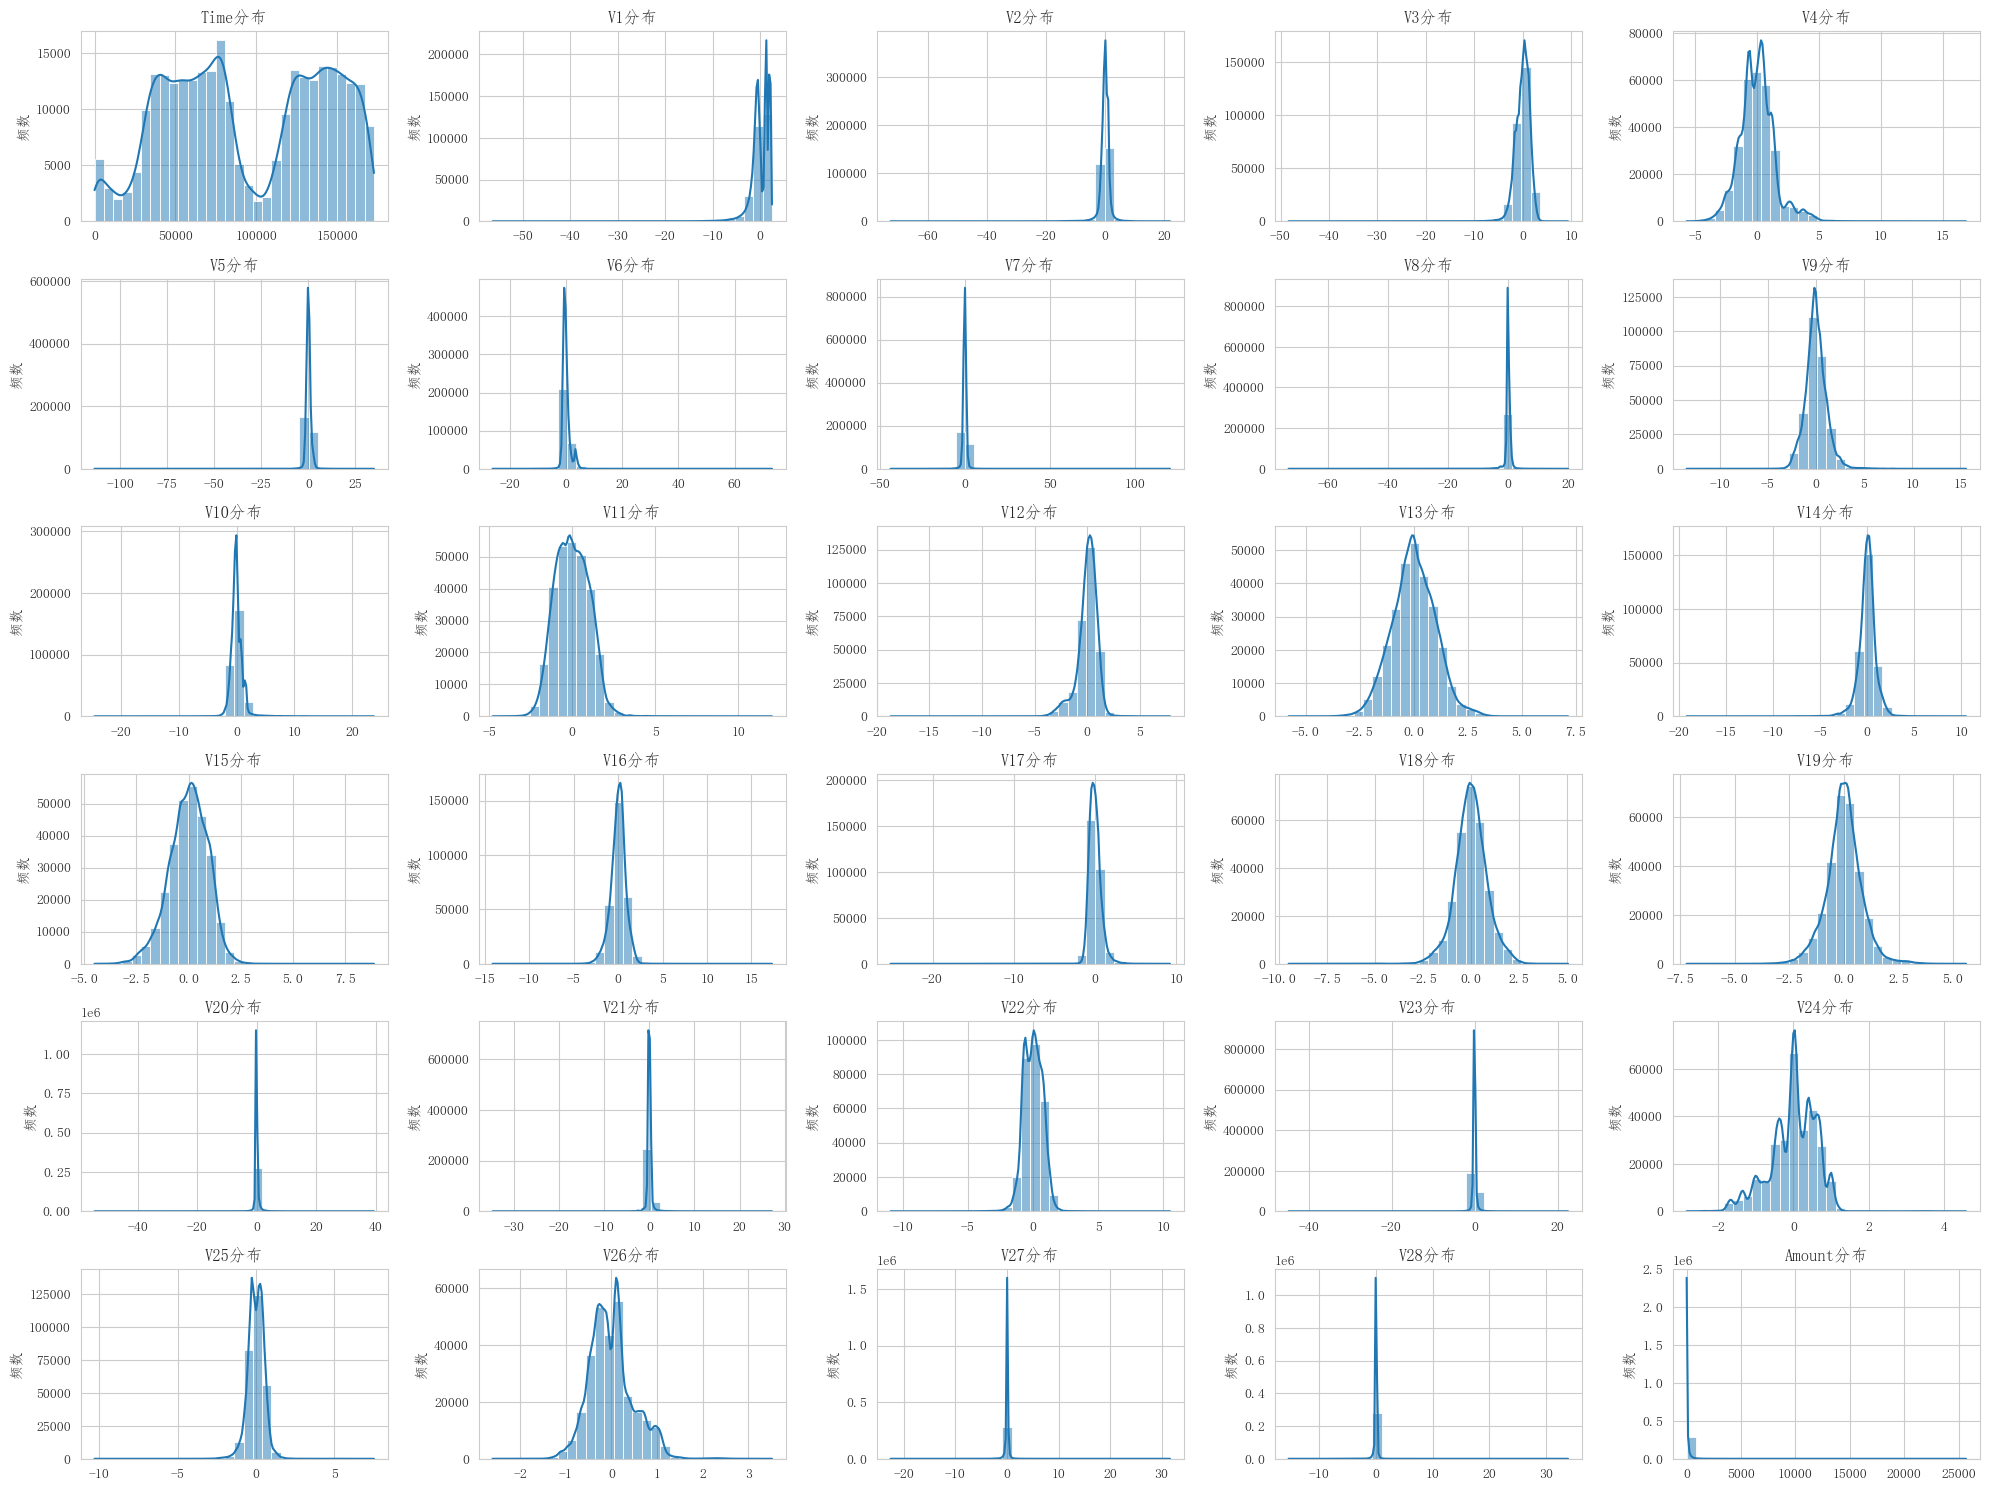

In [7]:
# 选择数值型列并明确排除 Class
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Class')

# 设置子图布局
n_cols = 5
n_rows = (len(num_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

# 绘制直方图+KDE
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'{col}分布', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('频数')

# 隐藏多余子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [8]:
# # 获取连续特征列（排除目标变量 'Class'）
# num_cols = df.drop(columns=['Class']).columns
#
# # 设置子图布局
# n_cols = 5  # 每行显示5个特征
# n_rows = (len(num_cols) + n_cols - 1) // n_cols  # 计算需要的行数
#
# # 创建子图
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
# axes = axes.flatten()  # 展平子图数组
#
# # 绘制直方图 + KDE
# for i, col in enumerate(num_cols):
#     sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
#     axes[i].set_title(f'{col} 分布', fontsize=12)
#     axes[i].set_xlabel('')
#     axes[i].set_ylabel('频数')
#
# # 隐藏多余子图
# for j in range(i + 1, len(axes)):
#     axes[j].set_visible(False)
#
# plt.tight_layout()
# plt.show()

In [9]:
# # 连续特征分布直方图
# df.drop(columns=['Class']).hist(bins=30, figsize=(20, 15))
# plt.tight_layout()
# plt.show()


### 3.3 异常值分析：连续特征的箱线图

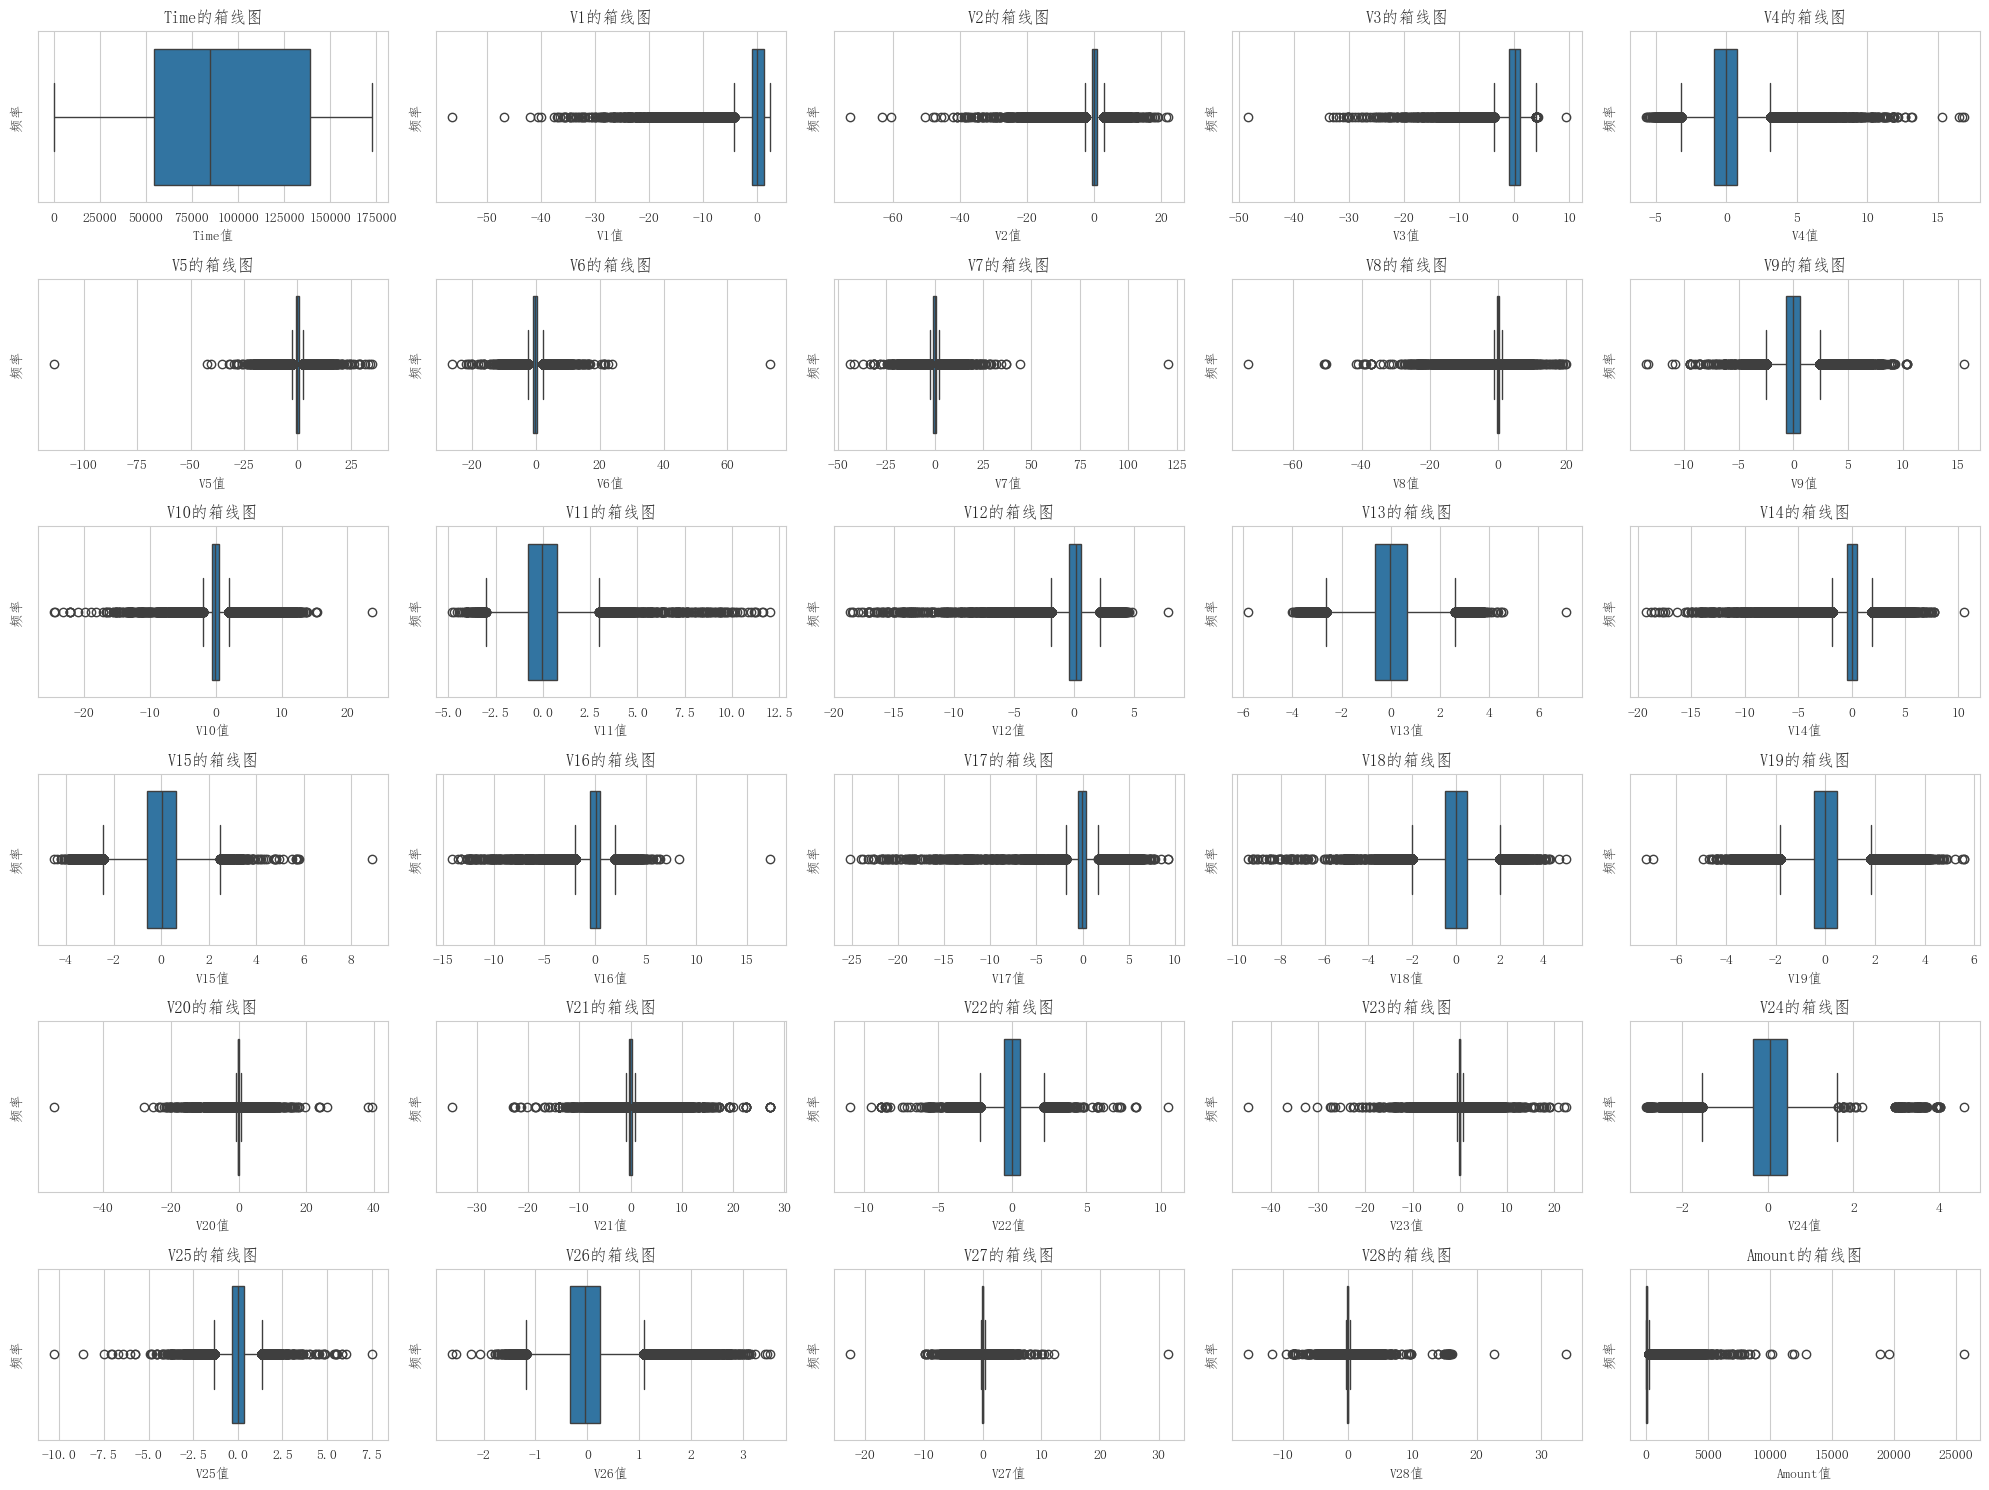

In [10]:
# 对连续特征绘制箱线图查看异常值
# 获取需要绘制箱线图的特征列表
columns = df.columns[:-1]  # 排除目标列

# 设置绘图布局，按列排列
n_cols = 5  # 每行显示5个图，修改为你需要的数量
n_rows = (len(columns) + n_cols - 1) // n_cols  # 自动计算需要多少行

# 创建子图，图像尺寸为20x15
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # 控制图像大小
axes = axes.flatten()  # 将二维的axes转换为一维，方便索引

# 绘制箱线图
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i])  # 将箱线图绘制到对应的子图
    axes[i].set_title(f'{col}的箱线图')  # 设置标题
    axes[i].set_xlabel(f'{col}值')  # 设置x轴标签
    axes[i].set_ylabel('频率')  # 设置y轴标签

# 删除多余的子图（如果有的话）
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # 调整子图布局，避免重叠
plt.show()


### 3.4从分布形状到异常值：直方图与箱线图的协同分析

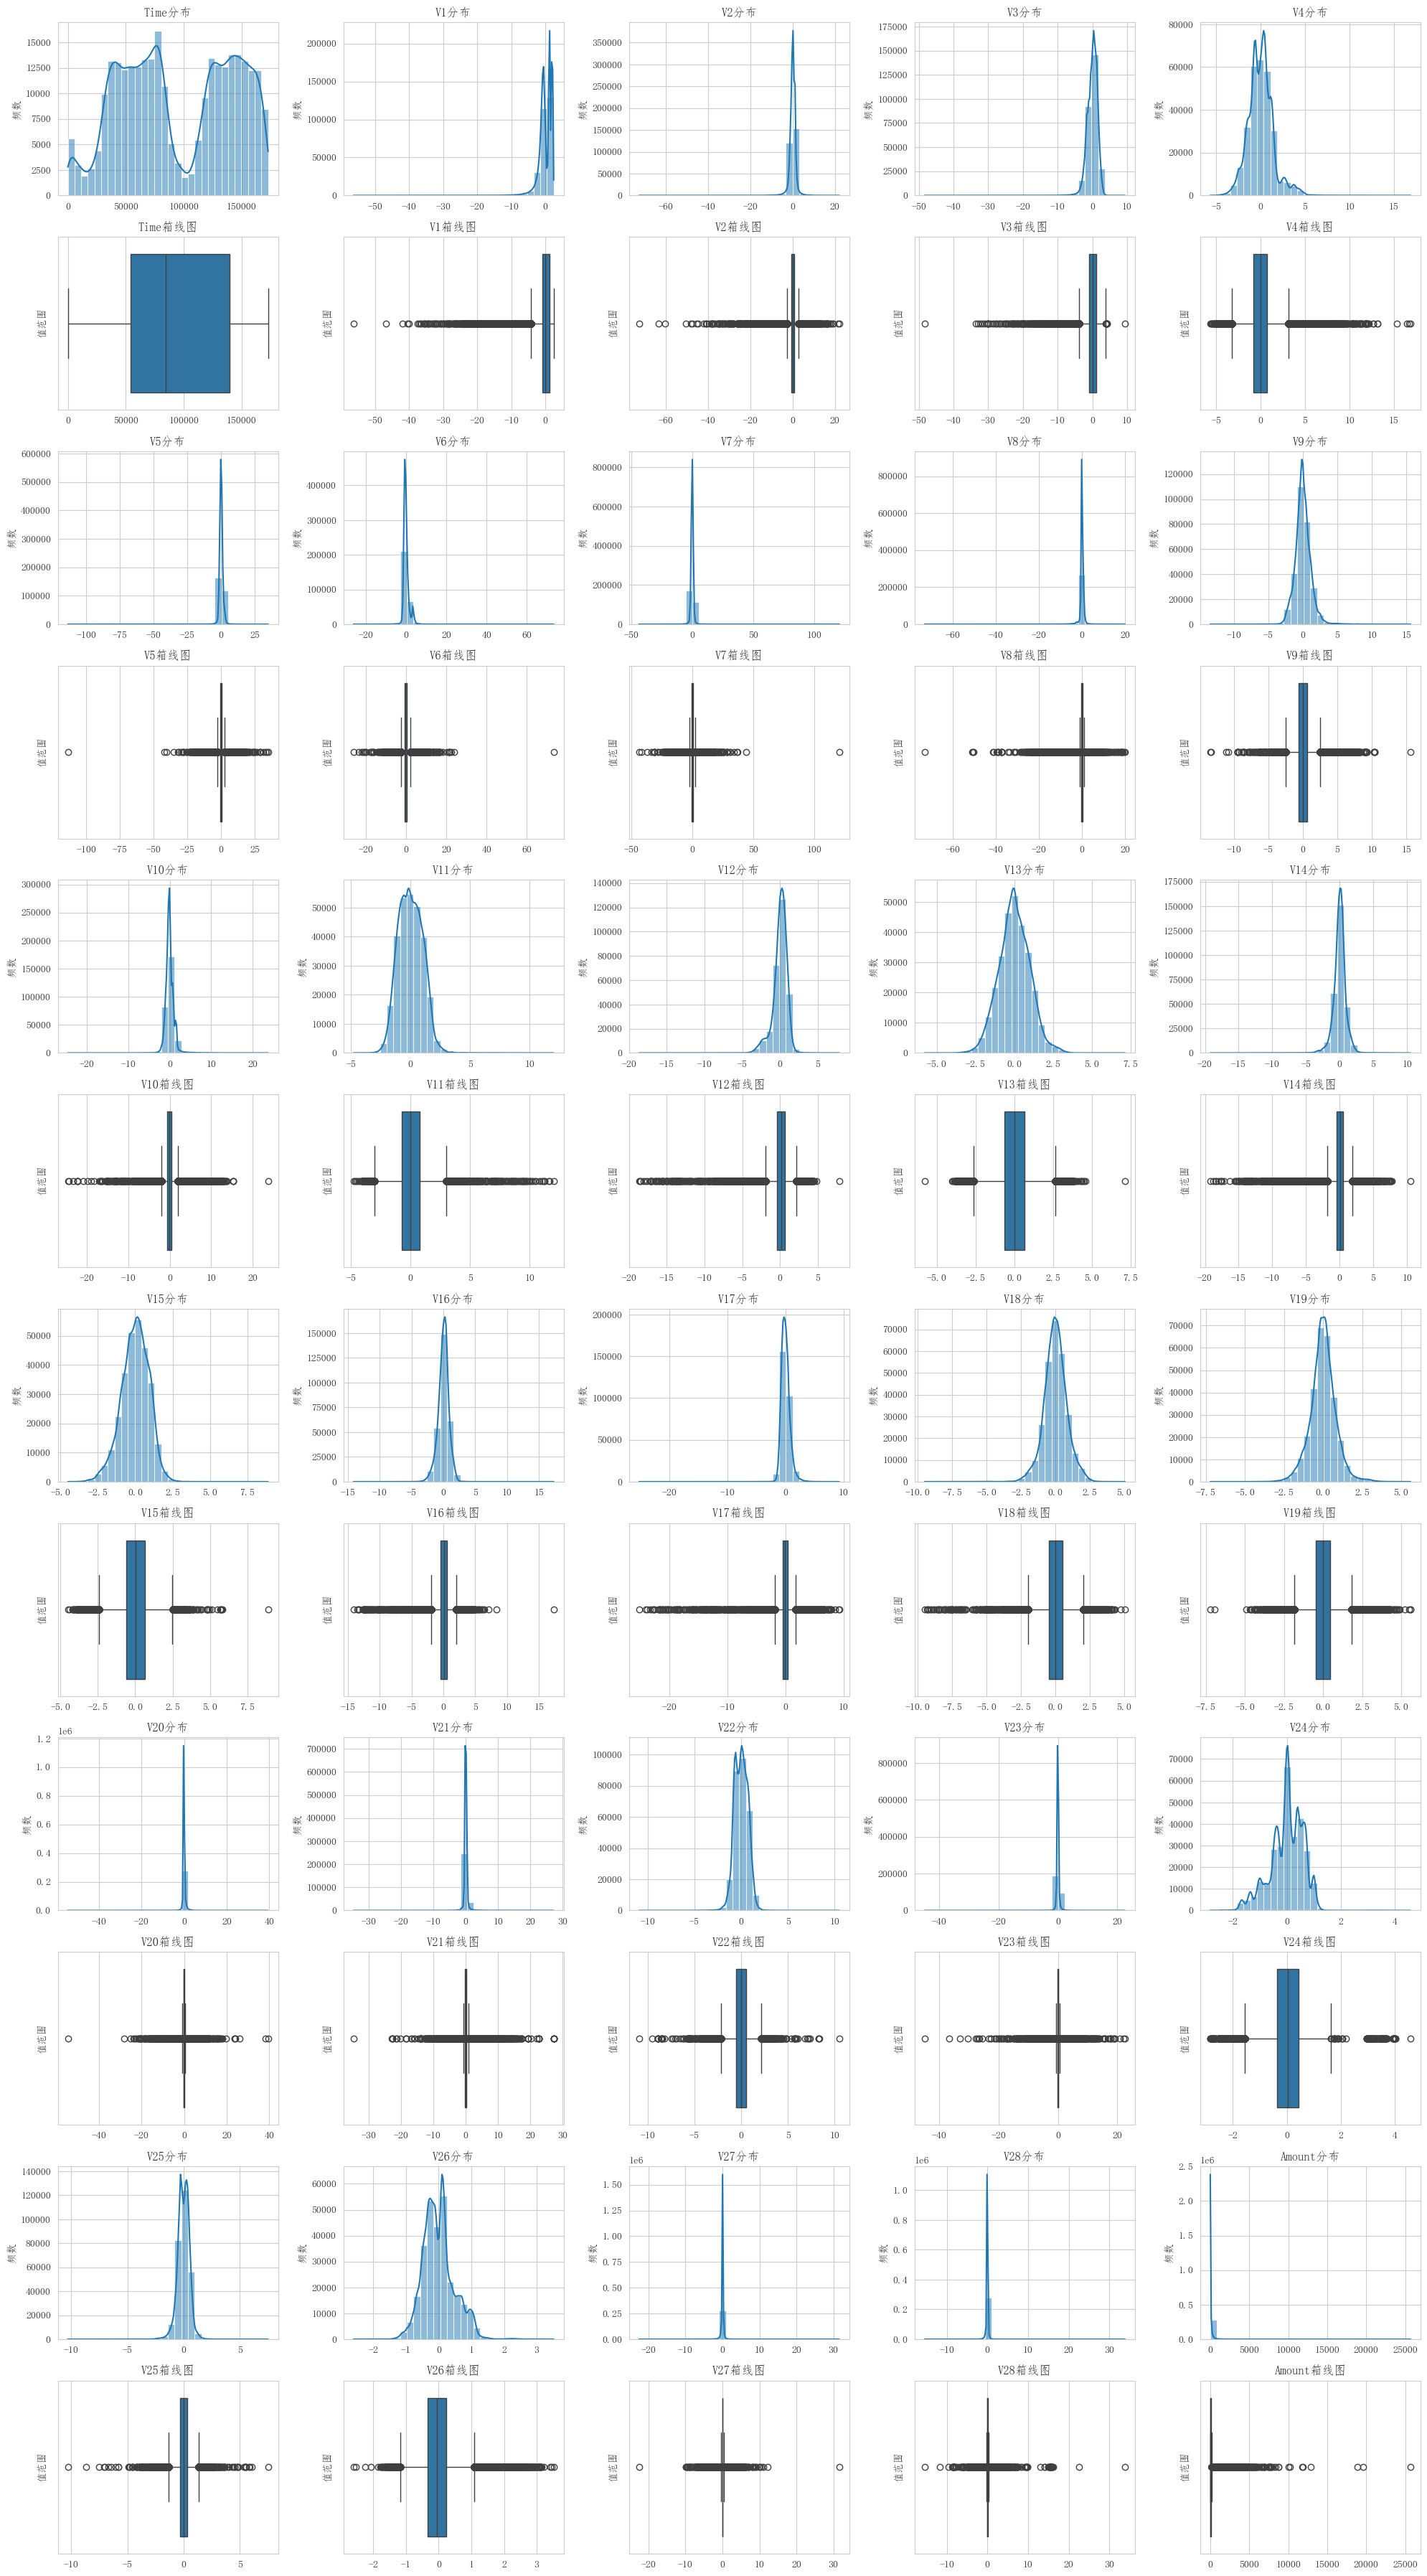

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 选择数值型列并明确排除 Class
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Class')

# 设置与原始箱线图代码一致的布局参数
n_cols = 5  # 每行5个特征组合
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # 计算需要多少行特征组合

# 创建画布（高度增加以容纳两倍子图）
fig, axes = plt.subplots(n_rows * 2, n_cols, figsize=(20, 6 * n_rows))  # 动态调整高度
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# 遍历所有特征
for i, col in enumerate(num_cols):
    # 计算当前子图位置
    row_pos = (i // n_cols) * 2  # 直方图行位置
    col_pos = i % n_cols         # 列位置

    # 绘制直方图+KDE（上方）
    sns.histplot(df[col], bins=30, kde=True, ax=axes[row_pos, col_pos])
    axes[row_pos, col_pos].set_title(f'{col}分布', fontsize=12)
    axes[row_pos, col_pos].set_xlabel('')
    axes[row_pos, col_pos].set_ylabel('频数')

    # 绘制箱线图（下方）
    sns.boxplot(x=df[col], ax=axes[row_pos+1, col_pos])
    axes[row_pos+1, col_pos].set_title(f'{col}箱线图', fontsize=12)
    axes[row_pos+1, col_pos].set_xlabel('')
    axes[row_pos+1, col_pos].set_ylabel('值范围')

# 隐藏多余子图
total_plots = len(num_cols)
for i in range(total_plots, n_rows * n_cols):
    row_pos = (i // n_cols) * 2
    col_pos = i % n_cols
    fig.delaxes(axes[row_pos, col_pos])
    fig.delaxes(axes[row_pos+1, col_pos])

plt.tight_layout()
plt.show()

## 4 相关性分析

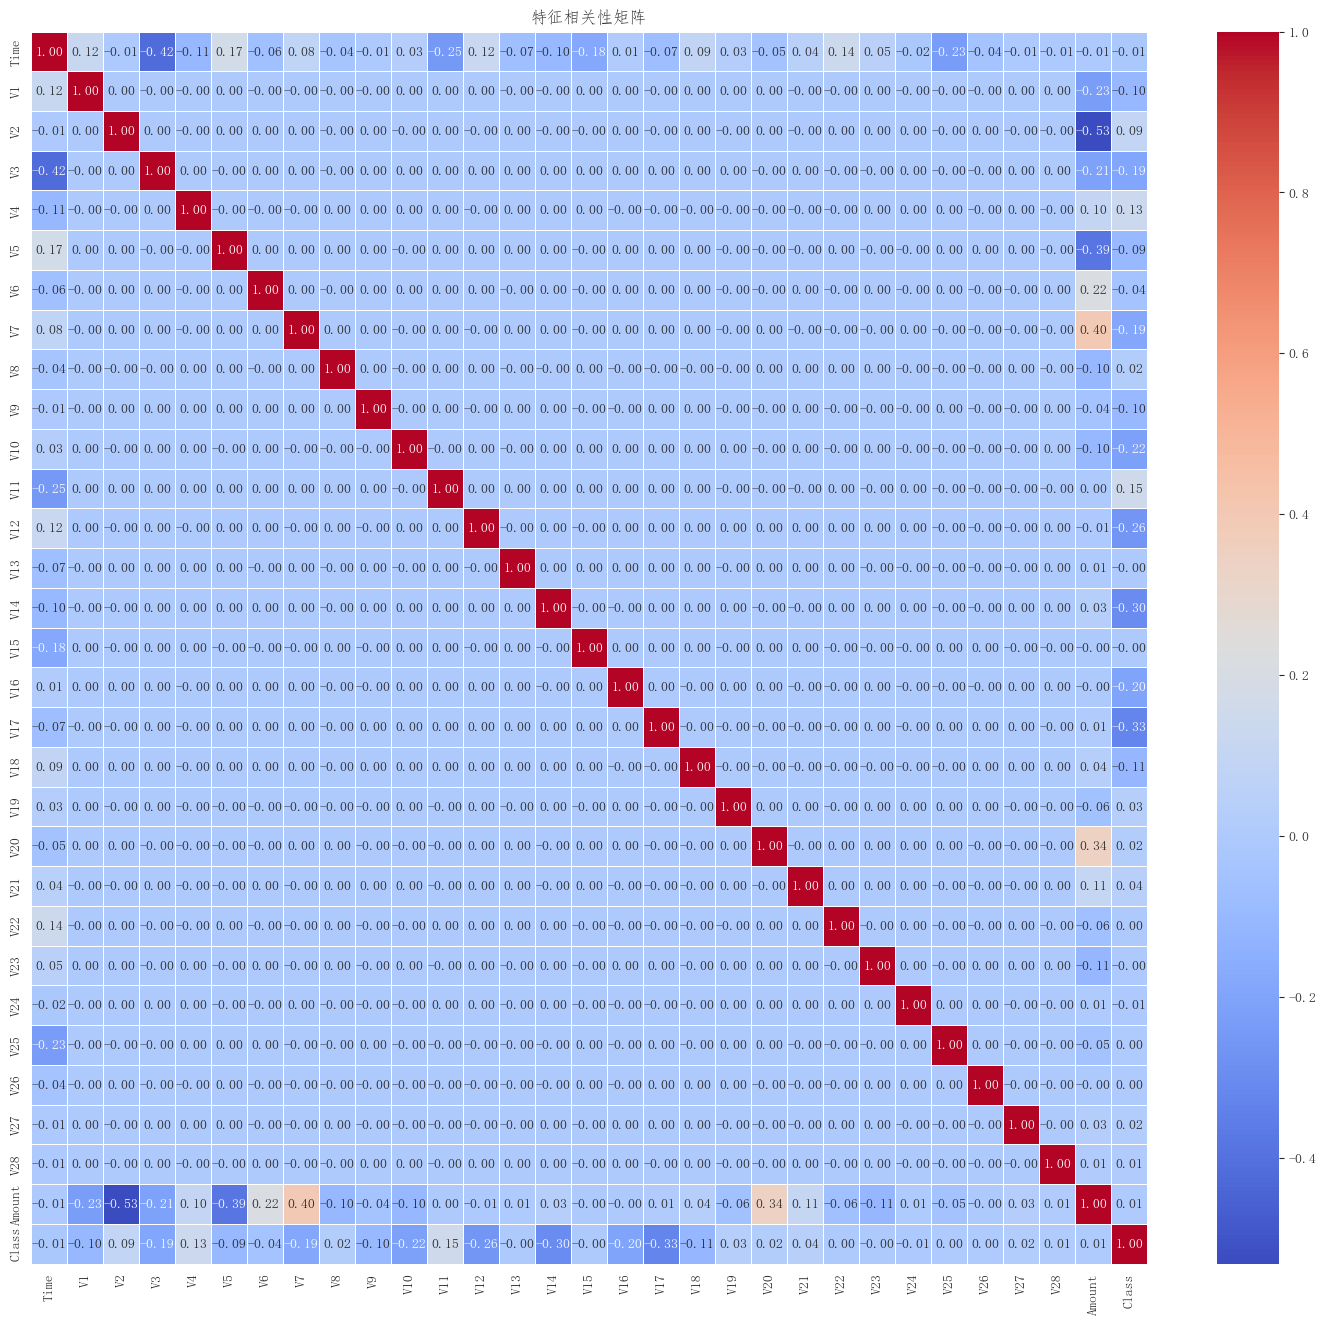

In [12]:
# 计算特征之间的相关性
corr = df.corr()

# 绘制相关性热图
plt.figure(figsize=(18, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('特征相关性矩阵')
plt.show()


## 5 特征工程与数据预处理

In [13]:
# 忽略警告
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# 特征标准化与归一化（如果需要）
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

# 将标准化后的特征与原数据集结合
df[num_cols] = scaled_df

# 独热编码（One-Hot Encoding）处理类别特征
df = pd.get_dummies(df, drop_first=True)

# 数据平衡：如果目标变量类别不平衡，使用SMOTE进行过采样
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

print(f"平衡后数据集类别分布：\n{y_res.value_counts()}")


平衡后数据集类别分布：
Class
0    284315
1    284315
Name: count, dtype: int64


## 6 SHAP值分析

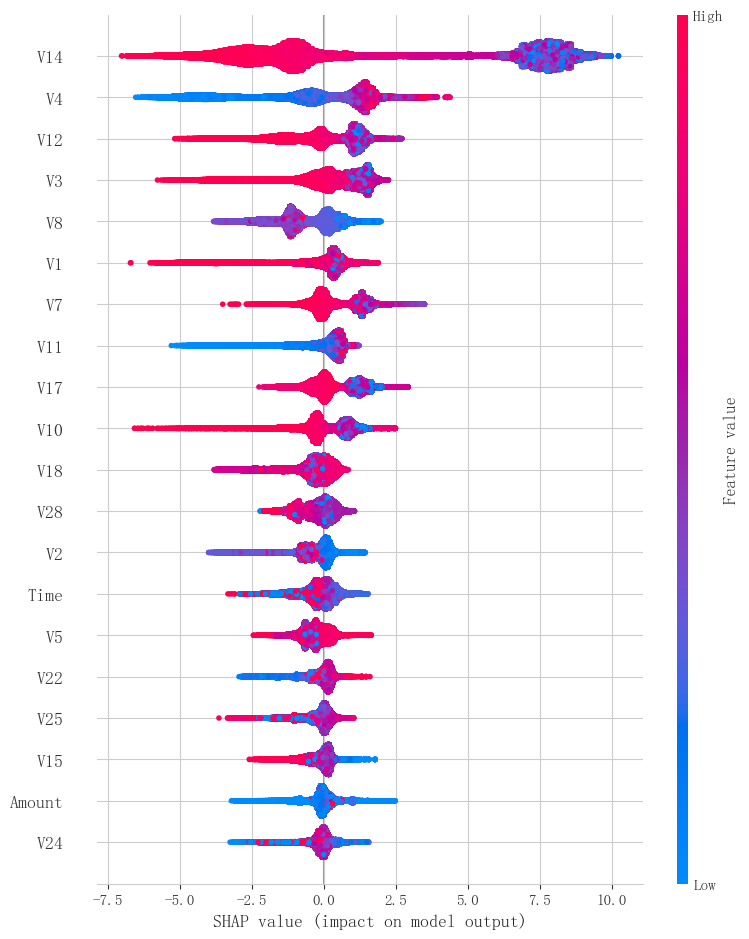

In [14]:
import shap
from xgboost import XGBClassifier

# 训练一个基础的模型
model = XGBClassifier()
model.fit(X_res, y_res)

# 生成SHAP值
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_res)
# 可视化SHAP值
shap.summary_plot(shap_values, X_res)


## 7 可视化工具：使用Sweetviz进行自动化EDA

In [15]:
import numpy as np

# 兼容 numpy 1.24+，为 Sweetviz 补充 VisibleDeprecationWarning
if not hasattr(np, "VisibleDeprecationWarning"):
    class VisibleDeprecationWarning(UserWarning):
        pass
    np.VisibleDeprecationWarning = VisibleDeprecationWarning

import sweetviz as sv

# 使用Sweetviz生成EDA报告
report = sv.analyze([df, 'train'], target_feat='Class')

# 输出报告为HTML文件
report.show_html('../output/EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report ../output/EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 8 总结

## 尝试删除异常值

In [5]:
numeric_columns = (list(df.loc[:, 'V1':'Amount']))

KeyboardInterrupt: 

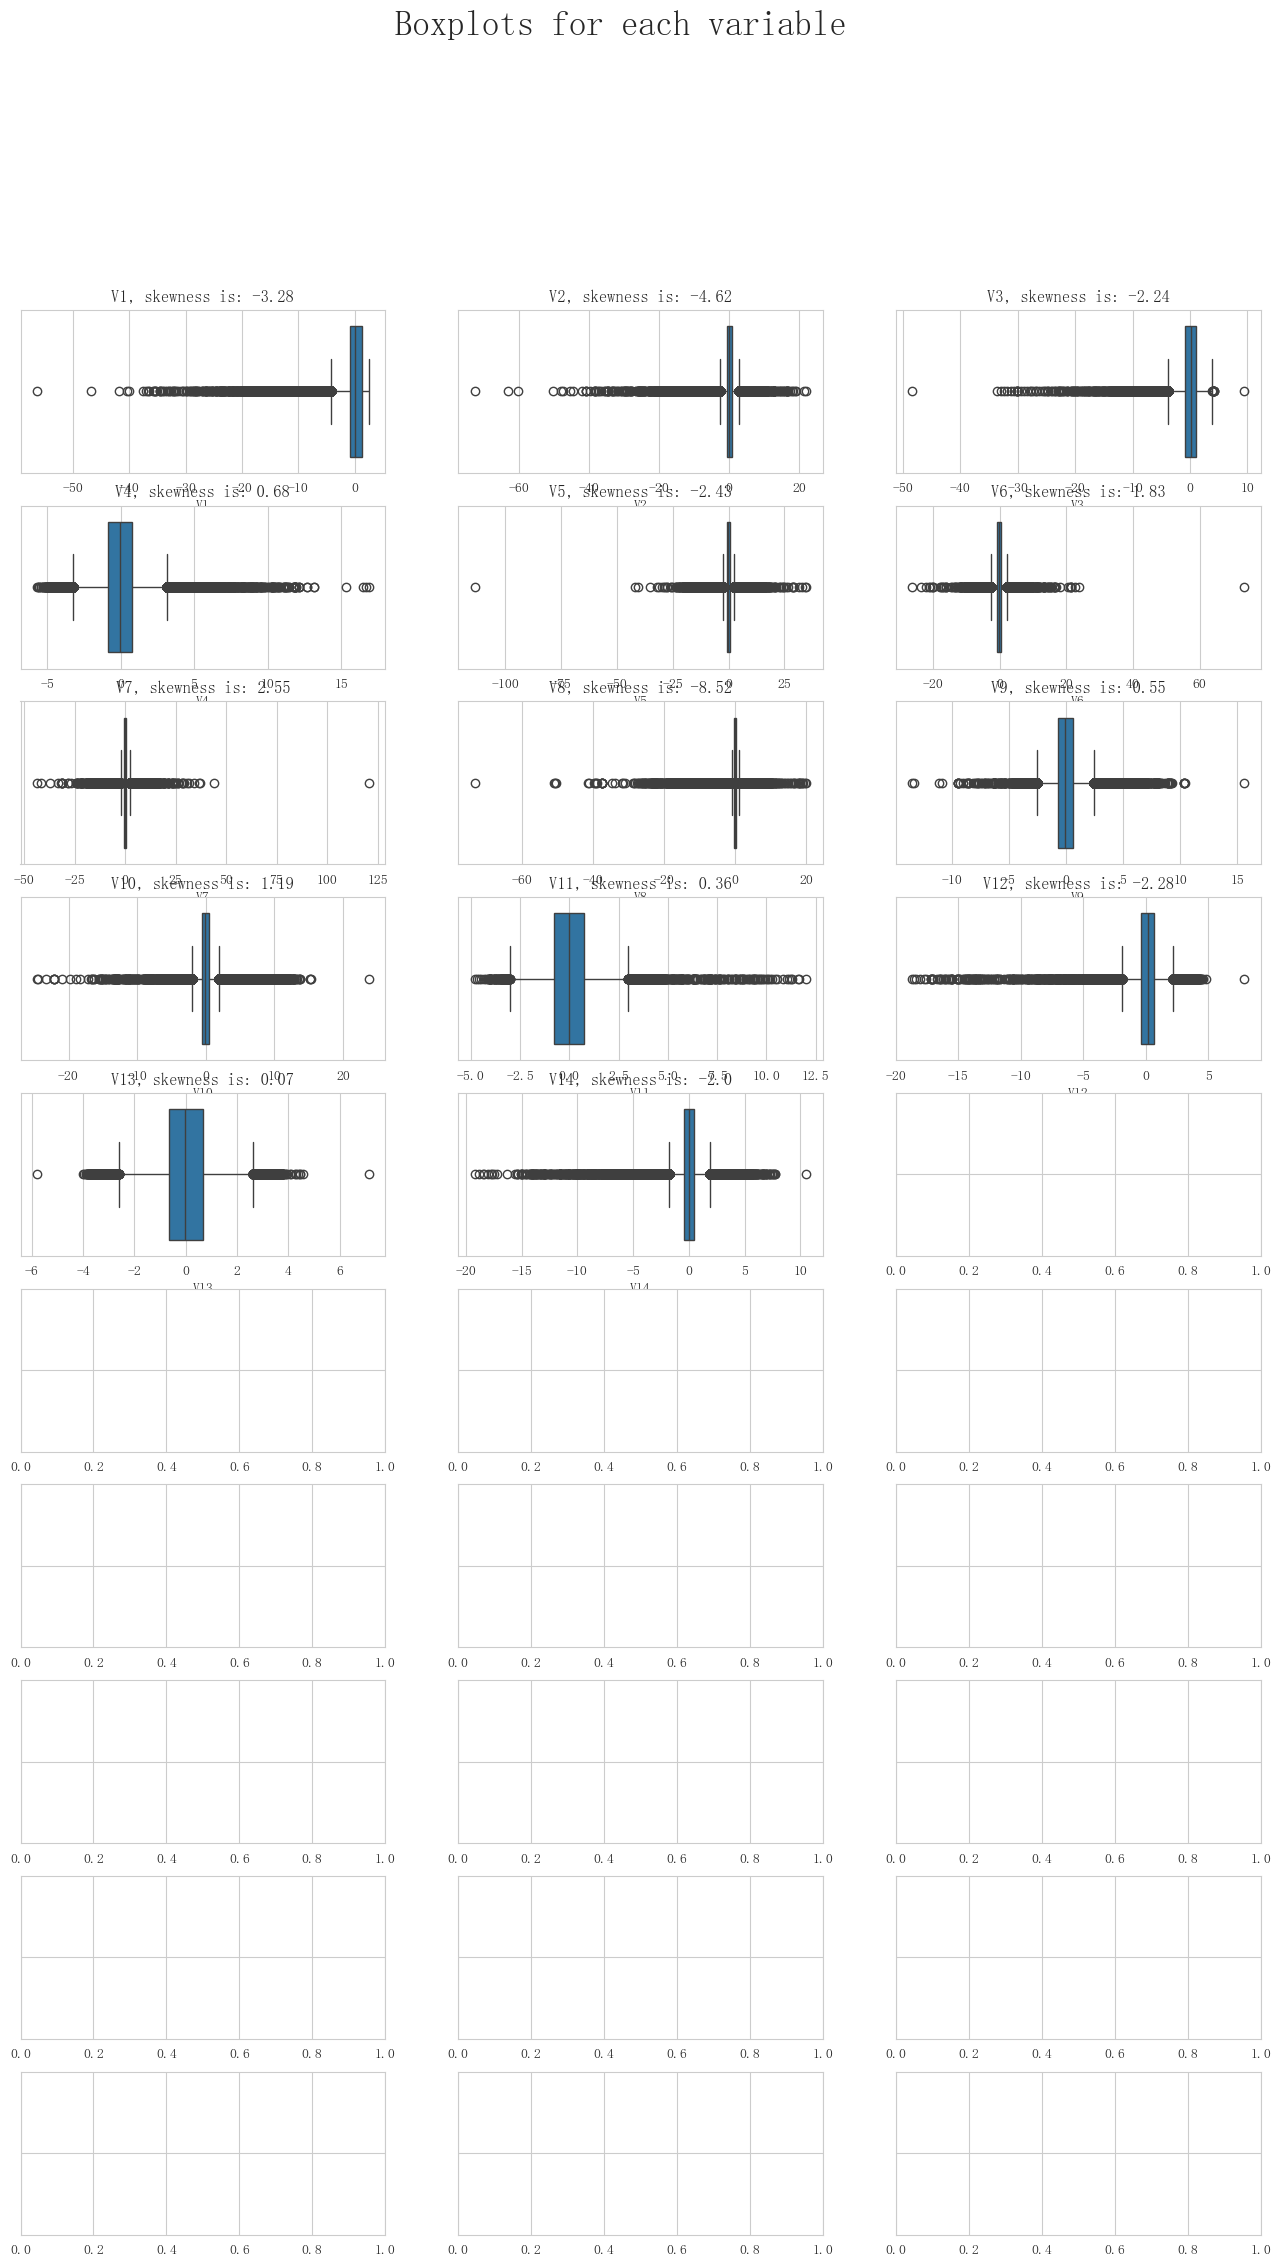

In [6]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=10, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [7]:
from collections import Counter

def IQR_method(df, n, features):
    """
    接收一个DataFrame，返回一个索引列表，对应于按照Tukey IQR方法检测到超过n个异常值的观测点。
    """
    outlier_list = []

    for column in features:
        # 第一四分位数（25%）
        Q1 = np.percentile(df[column], 25)
        # 第三四分位数（75%）
        Q3 = np.percentile(df[column], 75)
        # 四分位距（IQR）
        IQR = Q3 - Q1
        # 异常值步长
        outlier_step = 1.5 * IQR
        # 确定异常值索引列表
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        # 添加异常值索引到总列表
        outlier_list.extend(outlier_list_column)

    # 选择包含超过n个异常值的观测点
    outlier_list = Counter(outlier_list)
    multiple_outliers = list(k for k, v in outlier_list.items() if v > n)

    # 计算低于下界和高于上界的记录数
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]

    print('被删除的异常值总数为:', out1.shape[0] + out2.shape[0])

    return multiple_outliers

# 检测异常值
Outliers_IQR = IQR_method(df, 1, numeric_columns)

# 删除异常值
df_out = df.drop(Outliers_IQR, axis=0).reset_index(drop=True)

被删除的异常值总数为: 31904


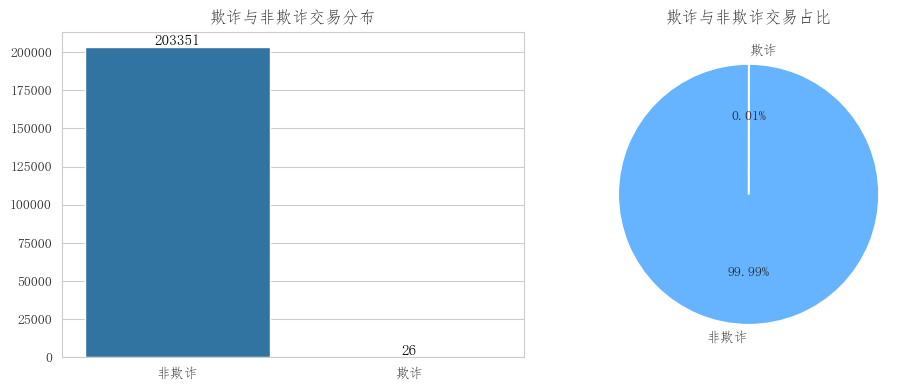

In [8]:
class_counts = df_out['Class'].value_counts()
labels = ['非欺诈', '欺诈']

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 左：柱状图
sns.countplot(x='Class', data=df_out, ax=axes[0])
axes[0].set_title('欺诈与非欺诈交易分布')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
# axes[0].set_xlabel('交易类型（0：非欺诈，1：欺诈）')
# axes[0].set_ylabel('数量')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(labels)

# 在柱子上加上数字
for patch in axes[0].patches:
    height = patch.get_height()
    axes[0].text(patch.get_x() + patch.get_width() / 2, height,
                 f'{int(height)}', ha='center', va='bottom', fontsize=11, color='black')

# 右：饼状图
axes[1].pie(class_counts, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
axes[1].set_title('欺诈与非欺诈交易占比')

plt.tight_layout()
plt.show()